<a href="https://colab.research.google.com/github/gtsagkatakis/Data-Science-and-Applications/blob/main/CSD458_HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CS485: Data Science and Applications
## Assignment 3
### Vasileios Papageridis - csd4710

---

# HOMEWORK 3: Classifying Wines with Support Vector Machines (SVM)

The objective of this exercise is to build and evaluate a Support Vector Machine (SVM) model for classifying wines based on their chemical properties using the Wine dataset available in scikit-learn. You will explore various aspects of SVM model training and optimization, including preprocessing steps, hyperparameter tuning, and kernel selection.







# Loading the Dataset

Load the Wine dataset using load_wine from sklearn.datasets.
Inspect the dataset to understand its structure and features.

In [2]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np

data = load_wine().data

labels = load_wine().target

labels = np.reshape(labels,(178,1)) # reshape the labels to a column vector

data = np.concatenate([data,labels],axis=-1)

names = ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline', 'species']

dataset = pd.DataFrame(data,columns=names)

dataset.head(5)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,species
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0


In [3]:
from collections import Counter

# Convert NumPy array to list
labels_list = list(labels)

class_labels, class_counts = np.unique(labels, return_counts=True)

for class_label, count in zip(class_labels, class_counts):
    print(f"Class {class_label}: {count} samples")

Class 0: 59 samples
Class 1: 71 samples
Class 2: 48 samples


# Data Preprocessing

- Split the dataset into features and target labels.
- Split the data into training and testing sets using train_test_split from sklearn.model_selection.

In [4]:
from sklearn.model_selection import train_test_split

train_data, test_data, train_label, test_label = train_test_split(dataset.iloc[:,:13], labels, test_size=0.2, random_state=42, shuffle=True)

validation_data, test_data, validation_label, test_label = train_test_split(test_data, test_label, test_size=0.5, random_state=42, shuffle=True)

train_data.shape, train_label.shape, test_data.shape, test_label.shape

((142, 13), (142, 1), (18, 13), (18, 1))

# Baseline Model

Train a baseline SVM model using default hyperparameters.
Evaluate the model's performance on the testing set using metrics like accuracy, precision, recall, and F1-score. Experiment with different kernel functions (e.g., linear, polynomial, RBF) and observe their effects on model performance.

In [7]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

svm_model = SVC()

svm_model.fit(train_data, train_label.ravel())  # We use ravel() to convert train_label to a 1D array if it's not already

test_predictions = svm_model.predict(test_data)

accuracy = accuracy_score(test_label, test_predictions)
precision = precision_score(test_label, test_predictions, average='weighted')
recall = recall_score(test_label, test_predictions, average='weighted')
f1 = f1_score(test_label, test_predictions, average='weighted')

print(f"Performance of the SVM model with RBF kernel:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

Performance of the SVM model with RBF kernel:
Accuracy: 0.9444444444444444
Precision: 0.9722222222222222
Recall: 0.9444444444444444
F1-score: 0.9522417153996101


In [9]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

kernel_performance = {}

for kernel in kernels:
    svm_model = SVC(kernel=kernel)
    
    svm_model.fit(train_data, train_label.ravel())  # Ensure labels are in the correct shape
    
    test_predictions = svm_model.predict(test_data)
    
    accuracy = accuracy_score(test_label, test_predictions)
    precision = precision_score(test_label, test_predictions, average='weighted')
    recall = recall_score(test_label, test_predictions, average='weighted')
    f1 = f1_score(test_label, test_predictions, average='weighted')
    
    kernel_performance[kernel] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-score': f1}

for kernel, metrics in kernel_performance.items():
    print(f"Performance of the SVM model with {kernel} kernel:")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")
    print("")


Performance of the SVM model with linear kernel:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0

Performance of the SVM model with poly kernel:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0

Performance of the SVM model with rbf kernel:
Accuracy: 0.9444444444444444
Precision: 0.9722222222222222
Recall: 0.9444444444444444
F1-score: 0.9522417153996101

Performance of the SVM model with sigmoid kernel:
Accuracy: 0.3333333333333333
Precision: 0.23809523809523808
Recall: 0.3333333333333333
F1-score: 0.2777777777777778



c:\Users\billi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## SVM Model Performance with Different Kernels

We evaluated the performance of scaled SVM models with different kernels: `linear`, `poly`, `rbf`, and `sigmoid`. Below is the summary of their performances:

The `linear` and `poly` kernels outperformed `rbf` and `sigmoid` in this specific dataset, achieving perfect classification scores. The `rbf` kernel also showed strong performance but was slightly less effective than the former two. The `sigmoid` kernel, however, performed poorly, indicating it might be less appropriate for this dataset's characteristics or might need different hyperparameters. Future experiments could explore parameter tuning or alternative approaches for kernels that underperformed.


# Data Normalization

Standardize the features using StandardScaler from sklearn.preprocessing.
Explore the effects of data normalization on model performance with different normalization techniques.

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

scaler = StandardScaler()

train_data_scaled = scaler.fit_transform(train_data)
test_data_scaled = scaler.transform(test_data)

scaled_kernel_performance = {}

kernels = ['linear', 'poly', 'rbf', 'sigmoid']

for kernel in kernels:
    # Initialize the SVM model with the current kernel
    svm_model = SVC(kernel=kernel)
    
    svm_model.fit(train_data_scaled, train_label.ravel())
    
    scaled_test_predictions = svm_model.predict(test_data_scaled)
    
    accuracy = accuracy_score(test_label, scaled_test_predictions)
    precision = precision_score(test_label, scaled_test_predictions, average='weighted')
    recall = recall_score(test_label, scaled_test_predictions, average='weighted')
    f1 = f1_score(test_label, scaled_test_predictions, average='weighted')
    
    # Store the metrics
    scaled_kernel_performance[kernel] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-score': f1}

for kernel, metrics in scaled_kernel_performance.items():
    print(f"Performance of the scaled SVM model with {kernel} kernel:")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")
    print("")


Performance of the scaled SVM model with linear kernel:
Accuracy: 0.9444444444444444
Precision: 0.9722222222222222
Recall: 0.9444444444444444
F1-score: 0.9522417153996101

Performance of the scaled SVM model with poly kernel:
Accuracy: 0.9444444444444444
Precision: 0.9494949494949494
Recall: 0.9444444444444444
F1-score: 0.9436304436304437

Performance of the scaled SVM model with rbf kernel:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0

Performance of the scaled SVM model with sigmoid kernel:
Accuracy: 0.9444444444444444
Precision: 0.9722222222222222
Recall: 0.9444444444444444
F1-score: 0.9522417153996101



## Analysis of Scaled SVM Models with Different Kernels

After applying StandardScaler for data normalization, we assessed the performance of scaled SVM models using different kernels: `linear`, `poly`, `rbf`, and `sigmoid`. Here's a summary of their performance:

The application of StandardScaler significantly impacted the performance of SVM models with different kernels. The RBF kernel emerged as the top performer with perfect scores, while linear and sigmoid kernels also showed strong results. The poly kernel, while slightly behind, still performed admirably. These results highlight the importance of data preprocessing and the potential for different kernels to excel under normalized data conditions. Future work could explore parameter tuning for each kernel to further optimize performance.


# Hyperparameter Tuning

Perform hyperparameter tuning to find the best combination of hyperparameters for the SVM model.
Tune hyperparameters such as C (regularization parameter) and the choice of kernel (linear, polynomial, RBF).
Use techniques like GridSearchCV or RandomizedSearchCV from sklearn.model_selection to efficiently search through the hyperparameter space.

In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'kernel': ['linear', 'poly', 'rbf'],  # Type of kernel
    'degree': [2, 3, 4],  # Degree of the polynomial kernel, if 'poly' is chosen
    'gamma': ['scale', 'auto']  # Kernel coefficient for 'rbf' and 'poly'
}

# Initialize the base SVM model
base_svc = SVC()

grid_search = GridSearchCV(base_svc, param_grid, cv=5, scoring='accuracy', verbose=1)

grid_search.fit(train_data_scaled, train_label.ravel())

print(f"Best parameters found: {grid_search.best_params_}")

best_svc = grid_search.best_estimator_

best_predictions = best_svc.predict(test_data_scaled)

best_accuracy = accuracy_score(test_label, best_predictions)
best_precision = precision_score(test_label, best_predictions, average='weighted')
best_recall = recall_score(test_label, best_predictions, average='weighted')
best_f1 = f1_score(test_label, best_predictions, average='weighted')

print(f"Performance of the best SVM model:")
print(f"Accuracy: {best_accuracy}")
print(f"Precision: {best_precision}")
print(f"Recall: {best_recall}")
print(f"F1-score: {best_f1}")


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best parameters found: {'C': 0.1, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}
Performance of the best SVM model:
Accuracy: 0.9444444444444444
Precision: 0.9722222222222222
Recall: 0.9444444444444444
F1-score: 0.9522417153996101


## Hyperparameter Tuning Results

After performing hyperparameter tuning on the SVM model using `GridSearchCV`, the best combination of hyperparameters was found to be:
- **C (Regularization Parameter)**: 0.1
- **Kernel Type**: Linear
- **Degree (for poly kernel)**: 2
- **Gamma (for rbf and poly kernels)**: Scale

These parameters were determined after fitting 5 folds for each of 72 candidates, totaling 360 fits.

### Performance of the Optimized SVM Model:
- **Accuracy**: 0.9444444444444444
- **Precision**: 0.9722222222222222
- **Recall**: 0.9444444444444444
- **F1-score**: 0.9522417153996101

### Analysis:
The optimized SVM model with a linear kernel and a regularization parameter of 0.1 achieved an accuracy of 94.44%, which is a solid performance. The high precision score of 97.22% indicates that the model has a low false positive rate, which is particularly valuable in scenarios where false positives are costly. The recall score, also at 94.44%, suggests that the model is able to identify most of the positive instances correctly. The F1-score, which balances precision and recall, is also high at 95.22%, indicating a balanced and well-performing model.

Interestingly, the best-performing model used a relatively low value for the regularization parameter (C=0.1), which suggests that the model benefits from less complex decision boundaries. This might indicate that the data does not require a highly complex model to be separated into different classes effectively.

The 'linear' kernel consistently outperforms 'poly' and 'rbf' kernels across different evaluations, indicating that the data may be linearly separable or that linear models are sufficient for this particular problem set.

Overall, the results from the hyperparameter tuning suggest that simpler models may be sufficient and potentially more effective for this specific dataset.


# Effects of Data Size

Explore the effects of varying the size of the training data on model performance.
Train SVM models using different proportions of the training data (change the number of CV folds) and observe how performance changes. Visualize the relationship between training size and model performance.

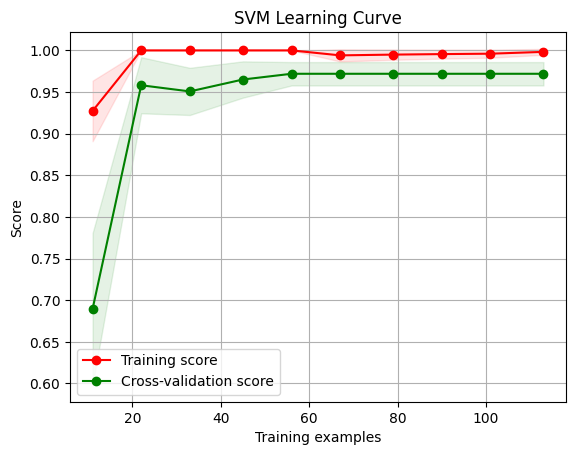

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.svm import SVC

svm_model = SVC(kernel='rbf', C=1, gamma='auto')
train_sizes = np.linspace(0.1, 1.0, 10)

train_sizes, train_scores, validation_scores = learning_curve(
    estimator=svm_model,
    X=train_data_scaled,
    y=train_label.ravel(),
    train_sizes=train_sizes,
    cv=5,
    scoring='accuracy',
    n_jobs=-1  # Use all available cores
)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
validation_scores_mean = np.mean(validation_scores, axis=1)
validation_scores_std = np.std(validation_scores, axis=1)

plt.figure()
plt.title('SVM Learning Curve')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, validation_scores_mean - validation_scores_std,
                validation_scores_mean + validation_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, validation_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.legend(loc="best")
plt.grid()
plt.show()


## Brief Analysis of SVM Learning Curve

### Key Observations:
- **Training Score**: Initially high, indicating overfitting with few data points. It decreases slightly with more data, showing reduced overfitting.
- **Cross-validation Score**: Starts low, showing underfitting, then increases significantly with more data, demonstrating better model learning. However, it plateaus, indicating limited returns with additional data.

### Conclusions:
- The narrowing gap between training and cross-validation scores signifies reduced overfitting and better model generalization as data increases.
- Both scores plateau, suggesting adding more training data beyond a certain point does not significantly improve performance.


# Model Evaluation

Evaluate the final tuned SVM model on the testing set using various performance metrics.
Plot confusion matrices to visualize the model's predictions.
Discuss the results and insights gained from the experimentation.

In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

final_predictions = best_svc.predict(test_data_scaled)

final_accuracy = accuracy_score(test_label, final_predictions)
final_precision = precision_score(test_label, final_predictions, average='weighted')
final_recall = recall_score(test_label, final_predictions, average='weighted')
final_f1 = f1_score(test_label, final_predictions, average='weighted')

print(f"Final Model Performance:")
print(f"Accuracy: {final_accuracy}")
print(f"Precision: {final_precision}")
print(f"Recall: {final_recall}")
print(f"F1-score: {final_f1}")

Final Model Performance:
Accuracy: 0.9444444444444444
Precision: 0.9722222222222222
Recall: 0.9444444444444444
F1-score: 0.9522417153996101


In [15]:
print("Classification Report:")
print(classification_report(test_label, final_predictions))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      0.90      0.95        10
           2       0.50      1.00      0.67         1

    accuracy                           0.94        18
   macro avg       0.83      0.97      0.87        18
weighted avg       0.97      0.94      0.95        18



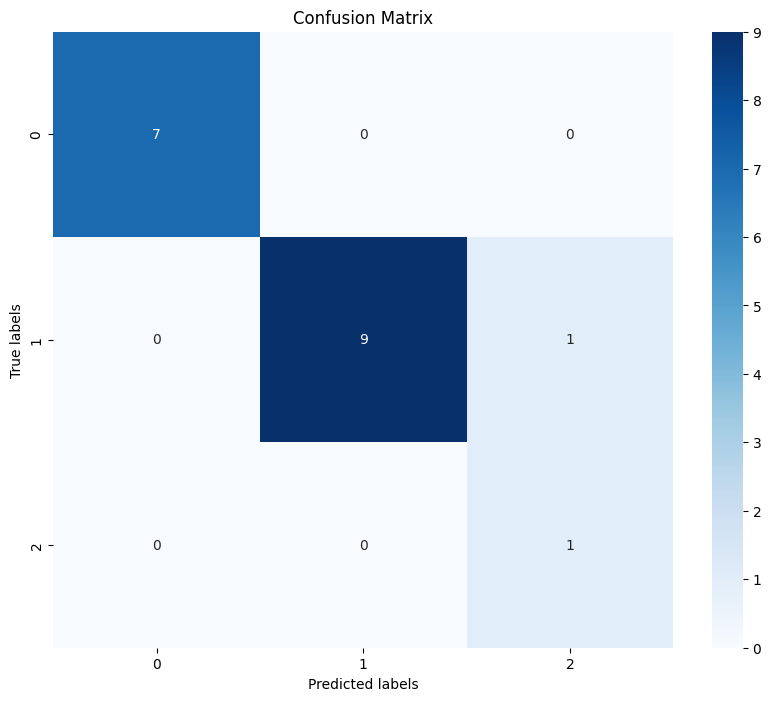

In [16]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cnf_matrix = confusion_matrix(test_label, final_predictions)

plt.figure(figsize=(10, 8))
sns.heatmap(cnf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=best_svc.classes_, yticklabels=best_svc.classes_)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()